# Librerias

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import zipfile

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot') 

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV

from imblearn.under_sampling import RandomUnderSampler

import multiprocessing

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

Valores: predicciones negativos, no tenia sentido. Se puede modelar el logaritmo

Ausencia de predictores: si es negativo, medias anteriores

sistema determinista en el que se asume unas condiciones de proceso dan un determinado resultado no como serie temporal de la variable respuesta. Proceso dinamico, interesa la P hace x tiempo no la de ahora, en un tramo previo del circuito. El valor de la variable hace 8 horas no influye 


columnas completas, variables correlacionadas, columnas con valores constantes, columnas muy desbalanceadas? combinar grupos minoritarios.
comenzar regresion logistica sin regu
regularizar por correlaciones
random forest, gradient boosting
metricas:
accuracy, F1 score
AUC - ROC



# Datos modelizacion

In [2]:
zip_file = zipfile.ZipFile(r"./Archive.zip")
datos_model_raw = pd.read_csv(zip_file.open("datos_para_modelizacion.csv"))
print(datos_model_raw.shape)
datos_model_raw.head(5)

(96188, 277)


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_267,var_268,var_269,var_270,var_271,var_272,var_273,var_274,var_275,label
0,9248245,0.0,0,0,0.0,0.0,0.00,0.0,0.0,1,...,0.0,1.0,0,0.0,0.0,0,0.0,0,0.0,0
1,10037840,0.0,0,0,0.0,0.0,0.00,0.0,0.0,1,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
2,10299029,0.0,0,0,0.0,0.0,24.44,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
3,10907006,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
4,14080498,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0


# Análisis descriptivo

In [3]:
datos_model_raw.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_267,var_268,var_269,var_270,var_271,var_272,var_273,var_274,var_275,label
count,9.618800e+04,96188.000000,96188.000000,96188.000000,96188.0,96188.000000,96188.000000,96188.000000,96188.000000,96188.000000,...,96188.000000,96188.000000,96188.000000,96188.000000,96188.000000,96188.0,96188.000000,96188.000000,96188.000000,96188.000000
mean,6.508026e+08,0.001985,0.009752,0.001071,0.0,0.000335,2.934996,0.000245,0.035151,0.206211,...,0.000602,0.759627,0.000073,0.031579,0.375511,0.0,0.000218,0.000042,0.005895,0.036314
std,7.305800e+08,0.232712,0.099947,0.032706,0.0,0.103920,14.669620,0.075933,2.553340,0.404586,...,0.131917,4.216230,0.008531,1.012583,4.675368,0.0,0.039093,0.006449,0.488573,0.187072
min,3.937070e+05,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.268936e+08,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,3.657658e+08,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,6.240783e+08,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,3.140207e+09,27.280000,3.000000,1.000000,0.0,32.230000,222.680000,23.550000,337.120000,1.000000,...,28.930000,442.000000,1.000000,112.500000,220.810000,0.0,7.000000,1.000000,40.500000,1.000000


## Variable Respuesta 

In [4]:
y = datos_model_raw["label"]
y.head(3)

0    0
1    0
2    0
Name: label, dtype: int64

In [5]:
y.value_counts()

0    92695
1     3493
Name: label, dtype: int64

<AxesSubplot:>

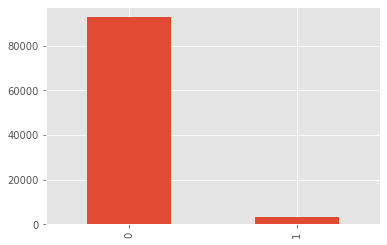

In [6]:
# Gráfico
# ==============================================================================
y.value_counts().plot(kind="bar")

## Predictores

In [7]:
# fijar var_0 ID cliente as index
datos_model = datos_model_raw.copy()
datos_model = datos_model.set_index('var_0')

### Valores constantes

Se eliminar columnas con valores constantes

In [8]:
# Numero de columnas con valores constantes
def valor_constante(col):
    col = col.to_numpy()
    return (col[0] == col).all()

cols_constantes = []

for col in datos_model.columns:
    if valor_constante(datos_model[col]):
        cols_constantes.append(col)
        
print("Número de columnas con valores constantes: ", len(cols_constantes))
print(cols_constantes)

Número de columnas con valores constantes:  36
['var_4', 'var_11', 'var_22', 'var_24', 'var_28', 'var_31', 'var_50', 'var_55', 'var_58', 'var_61', 'var_65', 'var_70', 'var_78', 'var_84', 'var_91', 'var_113', 'var_114', 'var_125', 'var_127', 'var_147', 'var_154', 'var_158', 'var_169', 'var_182', 'var_190', 'var_193', 'var_206', 'var_214', 'var_217', 'var_221', 'var_225', 'var_233', 'var_251', 'var_256', 'var_265', 'var_272']


In [9]:
datos_model = datos_model.drop(cols_constantes, axis=1)
datos_model.head()

,var_1,var_2,var_3,var_5,var_6,var_7,var_8,var_9,var_10,var_12,...,var_266,var_267,var_268,var_269,var_270,var_271,var_273,var_274,var_275,label
var_0,,,,,,,,,,,,,,,,,,,,,
9248245,0.0,0,0,0.0,0.00,0.0,0.0,1,0.0,0.0,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
10037840,0.0,0,0,0.0,0.00,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
10299029,0.0,0,0,0.0,24.44,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
10907006,0.0,0,0,0.0,0.00,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
14080498,0.0,0,0,0.0,0.00,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0


### NaNs

Columnas con algún missing value

In [10]:
# Columnas con número NaN >= 1
def is_nan(df_col):
    if df_col.isna().sum() >=1:
        x = True
    else:
        x = False
    return x

cols_with_nan = {}

for col in datos_model.columns:
    if is_nan(datos_model[col]):
        cols_with_nan[col] = datos_model[col].isna().sum()
        
print("Número de columnas con algún Nan: ", len(cols_with_nan))
print(cols_with_nan)

Número de columnas con algún Nan:  1
{'var_174': 19642}


In [11]:
print(datos_model["var_174"].describe())
datos_model["var_174"].unique()

count           76546
unique              3
top       CONVERGENTE
freq            36653
Name: var_174, dtype: object


array(['HIPERCONVERGENTE', 'CONVERGENTE', nan, 'RESTO'], dtype=object)

Se completa la var_174 añadiendo los Nan a la categoría RESTO, lo ideal sería hablarlo con negocio

In [12]:
datos_model["var_174"] = datos_model["var_174"].fillna(value="RESTO")

In [13]:
print(datos_model["var_174"].isna().sum())
print(datos_model["var_174"].unique())

0
['HIPERCONVERGENTE' 'CONVERGENTE' 'RESTO']


### Duplicates

In [ ]:
# Filas duplicadas
datos_model.duplicated().sum()

In [ ]:
# Columnas duplicadas
datos_model.T.duplicated().sum()

### Variables cualitativas

Se comprueban si existen y los valores de las columnas no numéricas

In [14]:
# Columnas no numéricas
df_no_num = datos_model.select_dtypes(exclude=["float64", "int64"])
df_no_num

,var_105,var_174,var_213
var_0,,,
9248245,antiguedad_0_6,HIPERCONVERGENTE,asignacion_NLMPYME_Low
10037840,antiguedad_12_18,CONVERGENTE,asignacion_NLMPYME_Low
10299029,antiguedad_36_72,CONVERGENTE,asignacion_NLMPYME_Low
10907006,antiguedad_6_12,CONVERGENTE,asignacion_NLMPYME_Low
14080498,antiguedad_gt_120,RESTO,asignacion_NLMPYME_Low
...,...,...,...
3027642699,antiguedad_gt_120,CONVERGENTE,asignacion_NLMPYME_Legacy_Ono
3039901891,antiguedad_0_6,CONVERGENTE,asignacion_NLMPYME_Low
3040108846,antiguedad_gt_120,RESTO,asignacion_NLMPYME_Legacy_Ono


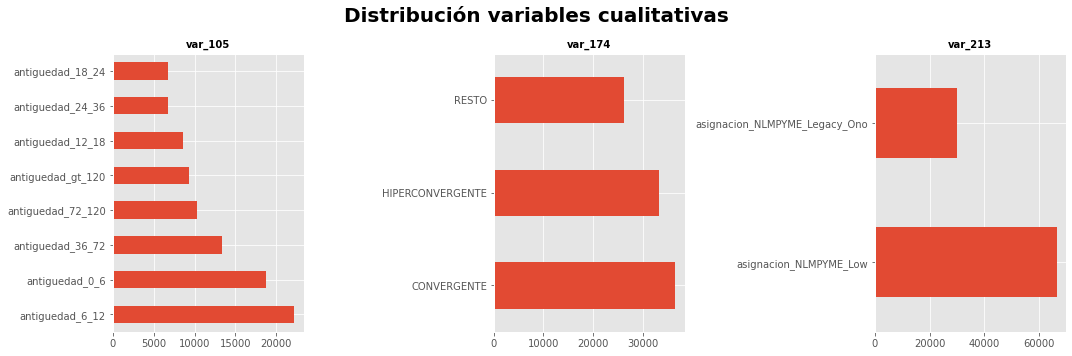

In [15]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flat
columnas_object = df_no_num.columns

for i, colum in enumerate(columnas_object):
    df_no_num[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.85)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 20, fontweight = "bold");

### Numéricas

In [16]:
# Correlación entre columnas numéricas
corr_mat = datos_model.select_dtypes(include=["float64", "int64"]).corr(method='pearson')

In [17]:
def tidy_corr_matrix(corr_mat):
    '''
    Convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['var_1','var_2','r']
    corr_mat = corr_mat.loc[corr_mat['var_1'] != corr_mat['var_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_mat = tidy_corr_matrix(corr_mat)
tidy_corr_mat = tidy_corr_mat[(tidy_corr_mat["var_1"] != "label") & (tidy_corr_mat["var_2"] != "label")]
tidy_corr_mat.head(5)

,var_1,var_2,r,abs_r
36421,var_179,var_187,1.0,1.0
37949,var_187,var_36,1.0,1.0
38073,var_187,var_179,1.0,1.0
7033,var_36,var_187,1.0,1.0
4893,var_25,var_179,1.0,1.0


In [18]:
print(datos_model["var_179"].value_counts())
print(datos_model["var_187"].value_counts())

0.0     96187
20.0        1
Name: var_179, dtype: int64
0.0     96187
30.0        1
Name: var_187, dtype: int64


Columnas con prácticamente todos los valores constantes

In [19]:
print("95% col mismo valor, número valores diferentes en col ", 96188 - 0.95*96188)
print("99% col mismo valor, número valores diferentes en col ", 96188 - 0.99*96188)
print("99,9% col mismo valor, número valores diferentes en col ", 96188 - 0.999*96188)
print("99,99% col mismo valor, número valores diferentes en col ", 96188 - 0.9999*96188)

95% col mismo valor, número valores diferentes en col  4809.400000000009
99% col mismo valor, número valores diferentes en col  961.8800000000047
99,9% col mismo valor, número valores diferentes en col  96.18799999999464
99,99% col mismo valor, número valores diferentes en col  9.618799999996554


In [20]:
# Limite 
x = 0.999 # % mismos valores en la columna 

# Numero de columnas con valores constantes
def porcentaje_constante(col):
    counts = col.value_counts().sort_values(ascending=False)
    porc = counts.to_numpy()[0] / col.shape[0]
    
    return porc

porc_constantes = []

for col in datos_model.select_dtypes(include=["float64", "int64"]):
    if porcentaje_constante(datos_model[col]) >= x:
        porc_constantes.append(col)
        
print("Número de columnas con valores constantes: ", len(porc_constantes))
print(porc_constantes)

Número de columnas con valores constantes:  122
['var_1', 'var_5', 'var_7', 'var_8', 'var_10', 'var_12', 'var_14', 'var_15', 'var_16', 'var_17', 'var_19', 'var_20', 'var_21', 'var_25', 'var_26', 'var_27', 'var_30', 'var_33', 'var_34', 'var_35', 'var_36', 'var_40', 'var_46', 'var_47', 'var_51', 'var_52', 'var_53', 'var_60', 'var_62', 'var_64', 'var_66', 'var_67', 'var_72', 'var_74', 'var_77', 'var_79', 'var_85', 'var_86', 'var_89', 'var_90', 'var_95', 'var_102', 'var_106', 'var_109', 'var_110', 'var_111', 'var_112', 'var_115', 'var_116', 'var_118', 'var_119', 'var_121', 'var_123', 'var_128', 'var_132', 'var_133', 'var_135', 'var_136', 'var_138', 'var_141', 'var_142', 'var_143', 'var_145', 'var_149', 'var_150', 'var_151', 'var_155', 'var_156', 'var_157', 'var_160', 'var_163', 'var_164', 'var_167', 'var_168', 'var_175', 'var_176', 'var_178', 'var_179', 'var_180', 'var_181', 'var_186', 'var_187', 'var_188', 'var_189', 'var_191', 'var_198', 'var_199', 'var_200', 'var_202', 'var_203', 'var_2

In [21]:
# Eliminar columnas con % constante
datos_model = datos_model.drop(porc_constantes, axis=1)
datos_model.head()

,var_2,var_3,var_6,var_9,var_13,var_18,var_23,var_29,var_32,var_37,...,var_255,var_257,var_258,var_260,var_261,var_266,var_268,var_270,var_271,label
var_0,,,,,,,,,,,,,,,,,,,,,
9248245,0,0,0.00,1,0.0,1.0,0.0,0,576.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
10037840,0,0,0.00,1,0.0,0.0,0.0,0,323.08,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
10299029,0,0,24.44,0,0.0,1.0,0.0,0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10907006,0,0,0.00,0,0.0,0.0,0.0,0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14080498,0,0,0.00,0,0.0,0.0,0.0,0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [22]:
# Correlación entre columnas numéricas
corr_mat = datos_model.corr(method='pearson')

tidy_corr_mat = tidy_corr_matrix(corr_mat)
tidy_corr_mat = tidy_corr_mat[(tidy_corr_mat["var_1"] != "label") & (tidy_corr_mat["var_2"] != "label")]
tidy_corr_mat.head(5)

,var_1,var_2,r,abs_r
2730,var_63,var_205,0.998921,0.998921
9798,var_205,var_63,0.998921,0.998921
991,var_32,var_170,0.991456,0.991456
8173,var_170,var_32,0.991456,0.991456
7341,var_148,var_231,-0.931877,0.931877


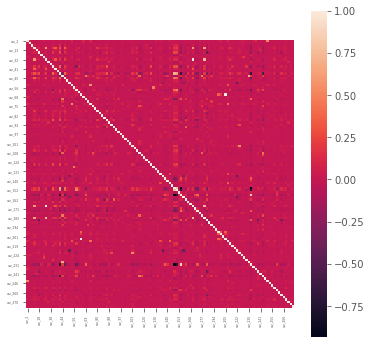

In [23]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.heatmap(
    corr_mat,
    square    = True,
    ax        = ax
)

ax.tick_params(labelsize = 3)

# Modelado

## Preprocesado

In [28]:
# División de los datos en train y test
# ==============================================================================
X = datos_model.drop("label", axis=1)
y = datos_model['label']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        stratify     = y
                                    )

In [29]:
# Preprocesado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Train
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_["cat"]['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = pd.DataFrame(X_train_prep, columns=labels)
datos_train_prep.info(verbose=True)

## LogisticRegression baseline

In [ ]:
# Creación del modelo
# ==============================================================================
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
modelo = LogisticRegression(penalty='none',
                            max_iter = 1000,
                            random_state = 1234)
modelo.fit(X = X_train_prep, y = y_train)

In [ ]:
# Predicción
# ==============================================================================
predicciones = modelo.predict(X_test_prep)

In [ ]:
def report_metrics(y_test, predicciones):

    print("Porcentaje de la clase mayoritaria: ", 100 * datos_model_raw['label'].value_counts(normalize=True)[0],"%")

    accuracy = accuracy_score(
                y_true    = y_test,
                y_pred    = predicciones,
                normalize = True
               )
    print("")
    print(f"El accuracy de test es: {100*accuracy} %")

    balanced_accuracy = balanced_accuracy_score(
                            y_true    = y_test,
                            y_pred    = predicciones,
                            adjusted  = True
               )
    print("")
    print(f"El balanced accuracy de test es: {100*balanced_accuracy} %")

    roc_auc = roc_auc_score(
                            y_true    = y_test,
                            y_score    = predicciones
                           )
    print("")
    print(f"El roc auc score de test es: {100*roc_auc} %")
    
    f1 = f1_score(
                        y_true    = y_test,
                        y_pred    = predicciones
                       )
    print("")
    print(f"El f1 score de test es: {f1}")
    
    # Clasification report de las predicciones de test
    # ==============================================================================
    print("")
    print(classification_report(y_true = y_test, 
                                y_pred = predicciones, 
                                labels=[0, 1]))

    # Matriz de confusión de las predicciones de test
    # ==============================================================================
    df_predicciones = pd.DataFrame({"predicciones": predicciones, "label": y_test})

    confusion_matrix = pd.crosstab(
        df_predicciones.label,
        df_predicciones.predicciones,
        rownames=['Real'],
        colnames=['Predicción']
    )
    print("")
    print(confusion_matrix)

In [ ]:
report_metrics(y_test, predicciones)

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': datos_train_prep.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo')
plt.show();

### Weighted

In [ ]:
# Creación del modelo
# ==============================================================================
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
modelo = LogisticRegression(
            penalty         = "none",
            C               = 1.0,
            fit_intercept   = True,
            class_weight    = {0: 1, 1: 26},
            max_iter        = 1000,
            n_jobs          = multiprocessing.cpu_count() - 1,
            random_state    = 1234
         )
modelo.fit(X = X_train_prep, y = y_train)

In [ ]:
# Predicción
# ==============================================================================
predicciones = modelo.predict(X_test_prep)

In [ ]:
# Report
# ==============================================================================
report_metrics(y_test, predicciones)

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': datos_train_prep.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo')
plt.show();

### Undersampling

In [ ]:
# Under sampler
# ==============================================================================
rus = RandomUnderSampler(random_state = 1234)
X_resampled, y_resampled = rus.fit_resample(X_train_prep, y_train)

In [ ]:
print(len(y_train[y_train == 0]))
print(len(y_resampled[y_resampled == 0]))
print("")
print(len(y_train[y_train == 1]))
print(len(y_resampled[y_resampled == 1]))

In [ ]:
# Creación del modelo
# ==============================================================================
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
modelo = LogisticRegression(
            penalty         = "none",
            C               = 1.0,
            fit_intercept   = True,
            max_iter        = 1000,
            n_jobs          = multiprocessing.cpu_count() - 1,
            random_state    = 1234
         )
modelo.fit(X = X_resampled, y = y_resampled)

In [ ]:
# Predicción
# ==============================================================================
predicciones = modelo.predict(X_test_prep)

In [ ]:
# Report
# ==============================================================================
report_metrics(y_test, predicciones)

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': datos_train_prep.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo')
plt.show();

## Random Forest

### Resampliing

In [ ]:
modelo = RandomForestClassifier(
                max_depth    = 7,
                max_features = 10,
                oob_score    = True,
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

modelo.fit(X = X_resampled, y = y_resampled)

In [ ]:
# Predicción
# ==============================================================================
predicciones = modelo.predict(X_test_prep)

In [ ]:
# Report
# ==============================================================================
report_metrics(y_test, predicciones)

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos_train_prep.columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

### Weighted

In [ ]:
modelo = RandomForestClassifier(
                max_depth    = 7,
                max_features = 10,
                oob_score    = True,    
                class_weight = {0: 1, 1: 26},
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

modelo.fit(X = X_train_prep, y = y_train)

In [ ]:
# Predicción
# ==============================================================================
predicciones = modelo.predict(X_test_prep)

In [ ]:
# Report
# ==============================================================================
report_metrics(y_test, predicciones)

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos_train_prep.columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

### Grid Search CV Weighted

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy'],
              'class_weight': [{0: 1, 1: 26}, 
                               {0: 1, 1: 15}, 
                               {0: 1, 1: 10}, 
                               {0: 1, 1: 1}],
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'roc_auc',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = StratifiedKFold(n_splits=5), 
        refit      = True,
        verbose    = True,
        return_train_score = True
       )

grid.fit(X = X_train_prep, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

In [ ]:
# Predicción
# ==============================================================================
predicciones = grid.best_estimator_.predict(X_test_prep)

In [ ]:
# Report
# ==============================================================================
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

report_metrics(y_test, predicciones)

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos_train_prep.columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

In [ ]:
modelo = RandomForestClassifier(
                n_estimators = 150,
                max_depth    = None,
                max_features = 9,
                criterion    = "entropy",
                oob_score    = True,    
                class_weight = {0: 1, 1: 26},
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

modelo.fit(X = X_train_prep, y = y_train)

In [ ]:
# Predicción
# ==============================================================================
predicciones = modelo.predict(X_test_prep)

# Report
# ==============================================================================
report_metrics(y_test, predicciones)

### Grid Undersampling

In [24]:
# Under sampler
# ==============================================================================
X = datos_model.drop("label", axis=1)
y = datos_model['label']

rus = RandomUnderSampler(random_state = 1234)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [25]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234
                                    )

In [30]:
# Preprocesado
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [31]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [500, 750, 1000],
              'max_features': [7, 9],
              'max_depth'   : [3, 10],
              'criterion'   : ['gini', 'entropy'],
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'roc_auc',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = StratifiedKFold(n_splits=5), 
        refit      = True,
        verbose    = True,
        return_train_score = True
       )

grid.fit(X = X_train_prep, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

In [ ]:
# Predicción
# ==============================================================================
predicciones = grid.best_estimator_.predict(X_test_prep)

In [ ]:
# Report
# ==============================================================================
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

report_metrics(y_test, predicciones)

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos_train_prep.columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

## Best RF

In [ ]:
# Under sampler
# ==============================================================================
X = datos_model.drop("label", axis=1)
y = datos_model['label']

rus = RandomUnderSampler(random_state = 1234)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
X_resampled_prep = preprocessor.fit_transform(X_resampled)

In [ ]:
modelo_final = RandomForestClassifier(
                        n_estimators = 1000,
                        max_depth    = 10,
                        max_features = 9,
                        criterion    = "gini",   
                        n_jobs       = multiprocessing.cpu_count() - 1,
                        random_state = 123
                     )

modelo_final.fit(X = X_resampled_prep, y = y_resampled)

## LogisticRegression con penalización

### Ridge

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
modelo = RidgeClassifierCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            store_cv_values = True
         )

modelo.fit(X = X_train_prep, y = y_train)

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []
scores = []

for alpha in alphas:
    modelo_temp = RidgeClassifier(alpha=alpha, fit_intercept=True)
    modelo_temp.fit(X_train_prep, y_train)
    coefs.append(modelo_temp.coef_.flatten())
    scores.append(modelo_temp.score(X_test_prep, y_test))

# fig, ax = plt.subplots(figsize=(7, 3.84))
# ax.plot(alphas, coefs)
# ax.set_xscale('log')
# ax.set_xlabel('alpha')
# ax.set_ylabel('coeficientes')
# ax.set_title('Coeficientes del modelo en función de la regularización');
# plt.axis('tight')
# plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
axes = axes.flat

axes[0].plot(alphas, coefs)
axes[0].set_xscale('log')
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('coeficientes')
axes[0].set_title('Coeficientes del modelo en función de la regularización')

axes[1].plot(alphas, scores)
axes[1].set_xscale('log')
axes[1].set_xlabel('scores')
axes[1].set_ylabel('scores')
axes[1].set_title('scores del modelo en función de la regularización')
axes[1].set_ylim(0.95, 0.98)

fig.tight_layout()
plt.subplots_adjust(top=0.90)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 20, fontweight = "bold")
plt.show();

In [ ]:
# Predicción
# ==============================================================================
predicciones = modelo.predict(X_test_prep)

In [ ]:
print("Porcentaje de la clase mayoritaria: ", 100 * datos_model_raw['label'].value_counts(normalize=True)[0],"%")

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy} %")

balanced_accuracy = balanced_accuracy_score(
                        y_true    = y_test,
                        y_pred    = predicciones,
                        adjusted  = True
           )
print("")
print(f"El balanced accuracy de test es: {100*balanced_accuracy} %")

In [ ]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
df_predicciones = pd.DataFrame({"predicciones": predicciones, "label": y_test})

confusion_matrix = pd.crosstab(
    df_predicciones.label,
    df_predicciones.predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

### Logistic Regression L1

In [ ]:
# Creación y entrenamiento del modelo 
# ==============================================================================
modelo = LogisticRegressionCV(
            penalty         = "l1",
            Cs              = np.logspace(-4, 4, 10),
            fit_intercept   = True,
            cv              = 3,
            scoring         = "balanced_accuracy",
            solver          = "saga",
            refit           = True,
            max_iter        = 10,
            n_jobs          = multiprocessing.cpu_count() - 1,
            verbose         = True
         )

modelo.fit(X = X_train_prep, y = y_train)

In [ ]:
# Evolución de los coeficientes en función de C
# ==============================================================================
cs = modelo.Cs_
coefs = []
scores = []

for c in cs:
    modelo_temp = LogisticRegression(
            penalty         = "l1",
            C               = c,
            fit_intercept   = True,
            solver          = "saga",
            max_iter=100,
            n_jobs          = multiprocessing.cpu_count() - 1,
         )
    modelo_temp.fit(X_train_prep, y_train)
    coefs.append(modelo_temp.coef_.flatten())
    predicciones_temp = modelo.predict(X_test_prep)
    balanced_accuracy = balanced_accuracy_score(
                        y_true    = y_test,
                        y_pred    = predicciones_temp,
                        adjusted  = True
           )
    scores.append(balanced_accuracy)

# fig, ax = plt.subplots(figsize=(7, 3.84))
# ax.plot(alphas, coefs)
# ax.set_xscale('log')
# ax.set_xlabel('alpha')
# ax.set_ylabel('coeficientes')
# ax.set_title('Coeficientes del modelo en función de la regularización');
# plt.axis('tight')
# plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
axes = axes.flat

axes[0].plot(cs, coefs)
axes[0].set_xscale('log')
axes[0].set_xlabel('C')
axes[0].set_ylabel('coeficientes')
axes[0].set_title('Coeficientes del modelo en función de la regularización')

axes[1].plot(cs, scores)
axes[1].set_xscale('log')
axes[1].set_xlabel('C')
axes[1].set_ylabel('scores')
axes[1].set_title('scores del modelo en función de la regularización')
# axes[1].set_ylim(0.95, 0.98)

fig.tight_layout()
plt.subplots_adjust(top=0.90)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 20, fontweight = "bold")
plt.show();

### Logistic Regression L2

In [ ]:
# Creación y entrenamiento del modelo 
# ==============================================================================
modelo = LogisticRegressionCV(
            penalty         = "l2",
            Cs              = np.logspace(-4, 4, 10),
            fit_intercept   = True,
            cv              = 3,
            scoring         = "balanced_accuracy_score",
            solver          = "saga",
            refit           = True,
            n_jobs          = multiprocessing.cpu_count() - 1,
            max_iter        = 1000,
            verbose         = True
         )

modelo.fit(X = X_train_prep, y = y_train)

In [ ]:
# Evolución de los coeficientes en función de C
# ==============================================================================
cs = np.logspace(-4, 4, 10)
coefs = []
scores = []

for c in cs:
    modelo_temp = LogisticRegression(
            penalty         = "l2",
            C               = c,
            fit_intercept   = True,
            solver          = "saga",
            max_iter        = 1000,
            n_jobs          = multiprocessing.cpu_count() - 1,
         )
    modelo_temp.fit(X_train_prep, y_train)
    coefs.append(modelo_temp.coef_.flatten())
    predicciones_temp = modelo.predict(X_test_prep)
    balanced_accuracy = balanced_accuracy_score(
                        y_true    = y_test,
                        y_pred    = predicciones_temp,
                        adjusted  = True
           )
    scores.append(balanced_accuracy)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
axes = axes.flat

axes[0].plot(cs, coefs)
axes[0].set_xscale('log')
axes[0].set_xlabel('C')
axes[0].set_ylabel('coeficientes')
axes[0].set_title('Coeficientes del modelo en función de la regularización')

axes[1].plot(cs, scores)
axes[1].set_xscale('log')
axes[1].set_xlabel('C')
axes[1].set_ylabel('scores')
axes[1].set_title('scores del modelo en función de la regularización')
# axes[1].set_ylim(0.95, 0.98)

fig.tight_layout()
plt.subplots_adjust(top=0.90)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 20, fontweight = "bold")
plt.show();

In [ ]:
modelo = LogisticRegression(
            penalty         = "elasticnet",
            C               = 1,
            fit_intercept   = True,
            solver          = "saga",
            max_iter        = 1000,
            n_jobs          = multiprocessing.cpu_count() - 1,
            l1_ratio = 0.5
         )
modelo.fit(X = X_train_prep, y = y_train)

In [ ]:
predicciones = modelo.predict(X_test_prep)
balanced_accuracy = balanced_accuracy_score(
                    y_true    = y_test,
                    y_pred    = predicciones,
                    adjusted  = True
       )
balanced_accuracy

# Datos predicción

In [ ]:
zip_file = zipfile.ZipFile(r"./Archive.zip")
datos_pred_raw = pd.read_csv(zip_file.open("datos_para_prediccion.csv"))

In [ ]:
datos_pred_raw

In [ ]:
datos_pred = datos_pred_raw[numeric_cols + cat_cols]
datos_pred["var_174"] = datos_pred["var_174"].fillna(value="RESTO")

In [ ]:
X_test_prep = preprocessor.transform(datos_pred)

In [ ]:
# Predicción
# ==============================================================================
predicciones = modelo_final.predict(X_test_prep)
np.unique(predicciones, return_counts=True)